In [2]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.25, '모평균의 차에 대한 신뢰구간 95% , \n신뢰구간 L = $2*{1.960}\\dfrac{\\sigma}{\\sqrt{n}} = $: \n(0.023 ~ 0.217)')

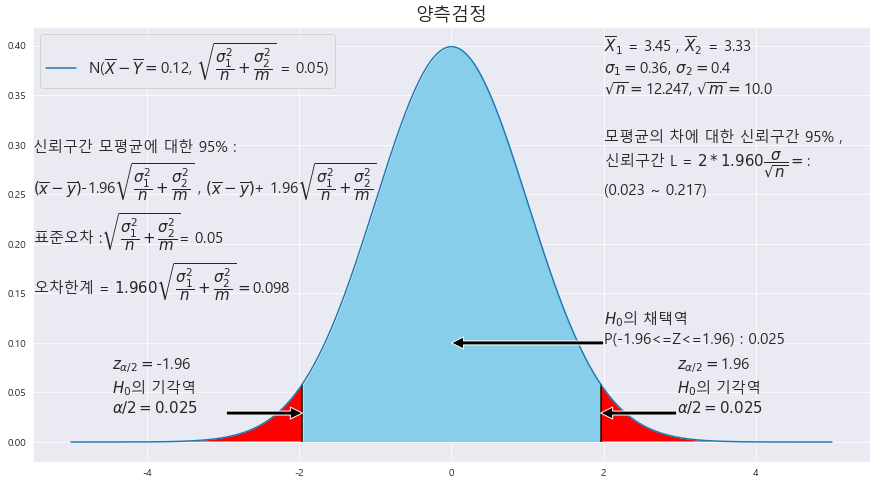

In [7]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도


ax.set_title('양측검정' ,fontsize = 18)
# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1) | (x<=-z_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(-1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
area = round((1-area)/2 ,3)
ax.text(1 + z_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{z_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 - z_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{-z_1}\n' + r'$H_{0}$의 기각역' + f'\n' + r'$\alpha/2 = {%.3f}$' % area ,fontsize=15)



ax.text(2 , .1, r'$H_{0}$의 채택역' +f'\nP({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)



# MEANS = 60.8
# STDS = round(math.sqrt(10.5**2),3) #모표준편차
# n = 2490



# ax.text(-5.5 , .35,  r'$\overline{X} = $'+f'{MEANS}\n' + r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)

b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')

# ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$ = ' + f'({round(MEANS - z_1*STDS/math.sqrt(n),2)} , {round(MEANS + z_1*STDS/math.sqrt(n),2)})',fontsize=15)
# ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(2* z_1 * STDS / math.sqrt(n),3)}',fontsize=15)
#
# ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

# ax.text(-5.5 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$ ' ,fontsize=15)
# ax.text(-5.5 , .25,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} $' % z_1 ,fontsize=15)
#
# ax.text(-5.5 , .3,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} $' % z_1,fontsize=15)




ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)


MEANS_A = 3.45
MEANS_B = 3.33
Var_A = 0.36**2
Var_B = 0.4**2
STDS_A = round(math.sqrt(Var_A),2)
STDS_B = round(math.sqrt(Var_B) , 2)
n_A = 150
n_B = 100

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(math.sqrt(Var_A/n_A + Var_B/n_B),3)}' , fontsize = 15)

ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{STDS_A}' + r', $\sigma_{2} = $' + f'{STDS_B}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_A),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_B),3)}',fontsize=15)


b  = r'N($\overline{X}-\overline{Y} = $' + f'{round(MEANS_A - MEANS_B,3)}, ' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$ = '+f'{round(math.sqrt(Var_A/n_A + Var_B/n_B) , 3)})'

plt.legend([b] , fontsize = 15 , loc='upper left')
ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % z_1 + f'{z_1 * round(math.sqrt(Var_A/n_A + Var_B/n_B) , 3)}',fontsize=15)

ax.text(2 , .25, f'모평균의 차에 대한 신뢰구간 {trust}% , \n' + r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1   +f': \n' + f'({round((MEANS_A-MEANS_B) - (z_1)*math.sqrt(Var_A/n_A + Var_B/n_B),3)} ~ {round((MEANS_A-MEANS_B) + (z_1)*math.sqrt(Var_A/n_A + Var_B/n_B),3)})' , fontsize= 15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2


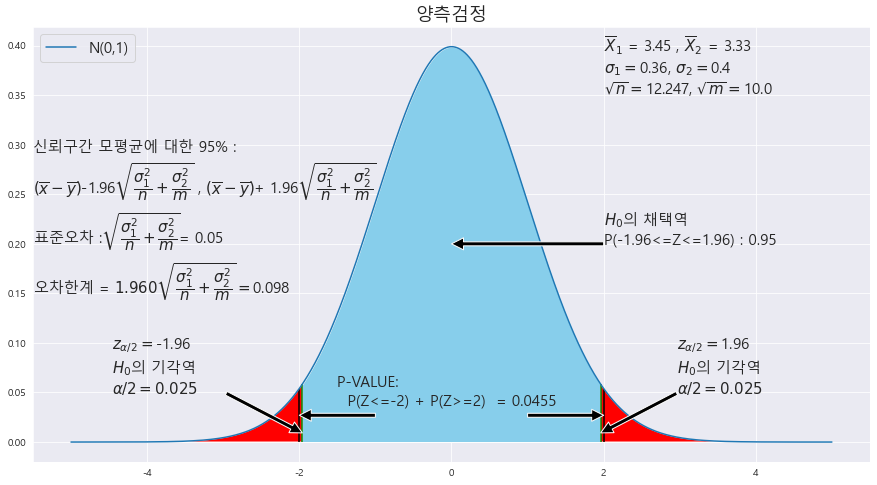

In [24]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도
MEANS_A = 3.45
MEANS_B = 3.33
MEANS = MEANS_A-MEANS_B
std_a = 0.36
std_b = 0.4
n_a = 150
n_b = 100
STDS = round(math.sqrt(std_a**2/n_a + std_b**2/n_b),3)


ax.set_title('양측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 95 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=t_1) & (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

area = round((1-area)/2 ,3)
ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len-0.02), xytext=(-1-t_1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))



ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(STDS,3)}' , fontsize = 15)

ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % t_1 + f'{round(t_1 * STDS , 3)}',fontsize=15)


ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)



#============================================표본평균의 정규분포화 =========================================================
z_1 = round(MEANS/STDS)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) | (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) + 1- scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-VALUE: \n  P(Z<={-z_1}) + P(Z>={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2


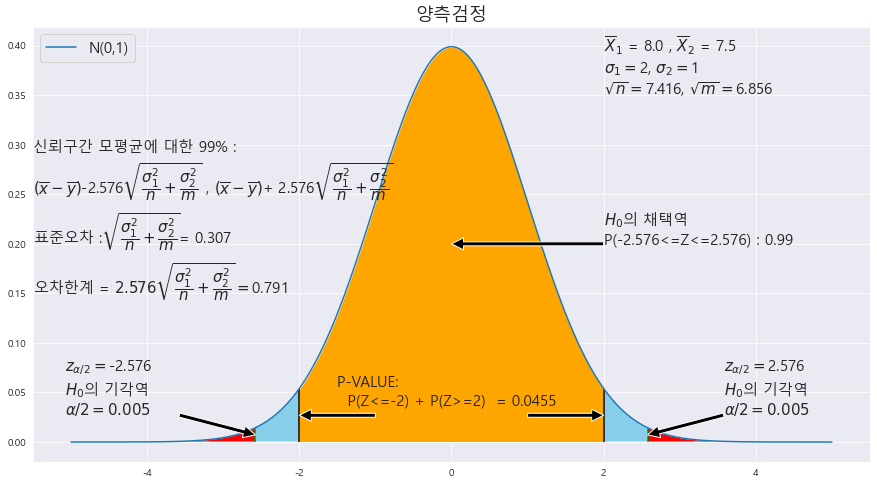

In [29]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도
MEANS_A = 8.0
MEANS_B = 7.5
MEANS = MEANS_A-MEANS_B
std_a = 2
std_b = 1
n_a = 55
n_b = 47
STDS = round(math.sqrt(std_a**2/n_a + std_b**2/n_b),3)


ax.set_title('양측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 99 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=t_1) & (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

area = round((1-area)/2 ,3)
ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len), xytext=(t_1+ 1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))



ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(STDS,3)}' , fontsize = 15)

ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % t_1 + f'{round(t_1 * STDS , 3)}',fontsize=15)


ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)



#============================================표본평균의 정규분포화 =========================================================
z_1 = round(MEANS/STDS)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1) | (x<=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) + 1- scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-VALUE: \n  P(Z<={-z_1}) + P(Z>={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1


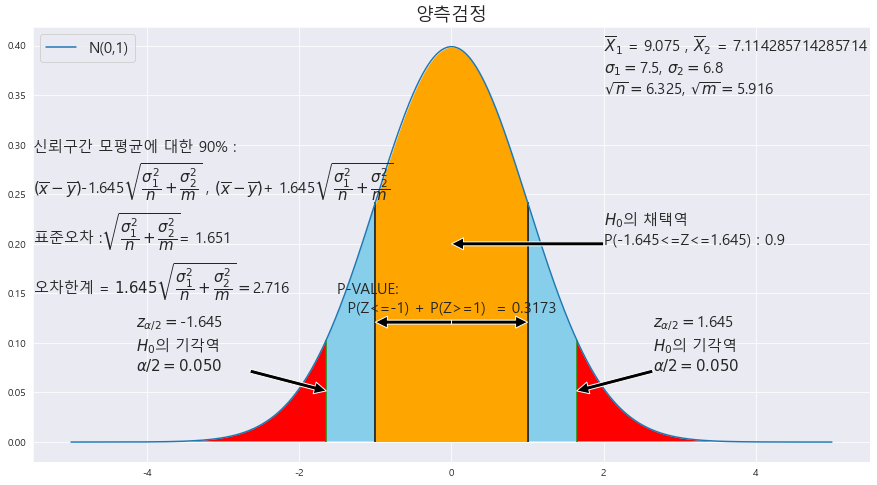

In [32]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도
A = "4 4 12 18 9 6 12 10 3 6 15 7 3 55 1 2 10 13 5 7 1 23 9 2 1 17 2 24 11 14 6 2 1 8 1 3 19 3 1 13"
B = "14 7 15 1 12 1 3 7 21 4 1 5 4 4 3 5 18 12 5 1 7 7 2 15 4 9 10 7 3 6 5 9 6 2 14"

A = list(map(int, A.split(' ')))
B= list(map(int, B.split(' ')))


MEANS_A = np.mean(A)
MEANS_B = np.mean(B)
MEANS = round(MEANS_A-MEANS_B ,3)
std_a = 7.5
std_b = 6.8
n_a = len(A)
n_b = len(B)
STDS = round(math.sqrt(std_a**2/n_a + std_b**2/n_b),3)


ax.set_title('양측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 90 #신뢰도_유의수준

t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )


ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=t_1) & (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1) - scipy.stats.norm.cdf(-t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP({-t_1}<=Z<={t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

area = round((1-area)/2 ,3)
ax.text(1 + t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)
ax.text(-2.5 -t_1 , annotate_len+0.02 , r'$z_{\alpha/2} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역' + f'\n'+ r'$\alpha/2 = {%.3f}$' % area,fontsize=15)


plt.annotate('' , xy=(t_1, annotate_len), xytext=(t_1+ 1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len+0.02)  , arrowprops = dict(facecolor = 'black'))



ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(STDS,3)}' , fontsize = 15)

ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % t_1 + f'{round(t_1 * STDS , 3)}',fontsize=15)


ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)



#============================================표본평균의 정규분포화 =========================================================
z_1 = round(MEANS/STDS)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(z_1)
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=z_1) | (x<=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x>=t_1) | (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(-z_1) + 1- scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1- 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-z_1, annotate_len), xytext=(1-z_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.01 , f'P-VALUE: \n  P(Z<={-z_1}) + P(Z>={z_1})  = {round(area,4)}',fontsize=15)


b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2.326


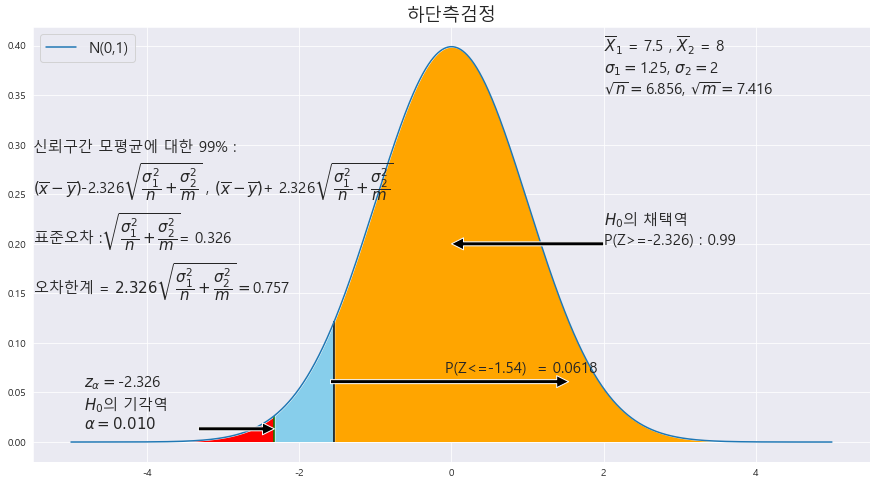

In [56]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

# trust = 95 #신뢰도

MEANS_A = 7.5
MEANS_B = 8
MEANS = round(MEANS_A-MEANS_B ,3)
std_a = 1.25
std_b = 2
n_a = 47
n_b = 55
STDS = round(math.sqrt( (std_a**2/n_a) + (std_b**2/n_b)),4)



ax.set_title('하단측검정' ,fontsize = 18)



#==========================================귀무가설 기각과 채택 ====================================================
trust = 99 #신뢰도_유의수준
trust = trust - (100-trust)
t_1  = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )
print(t_1)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x>=-t_1) , facecolor = 'orange') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(t_1)

plt.annotate('' , xy=(0, .2), xytext=(2 , .2)  , arrowprops = dict(facecolor = 'black'))
ax.text(2 , .2, r'$H_{0}$의 채택역' +f'\nP(Z>={-t_1}) : {round(area,4)}',fontsize=15)

annotate_len = stats.norm.pdf(t_1, loc=0 , scale =1) /2
# ax.vlines(x= t_1, ymin= 0 , ymax= stats.norm.pdf(t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.norm.pdf(-t_1, loc=0 , scale =1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

# ax.text(1 + t_1 , annotate_len , r'$z_{\alpha/2} = $' + f'{t_1}\n' + r'$H_{0}$의 기각역',fontsize=15)
area = 1-area
ax.text(-2.5 -t_1 , annotate_len , r'$z_{\alpha} = $' + f'{-t_1}\n' + r'$H_{0}$의 기각역'+f'\n' +r'$\alpha = {%.3f}$' % area,fontsize=15)


# plt.annotate('' , xy=(t_1, annotate_len-0.02), xytext=(t_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(-1-t_1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))

trust = 99
ax.text(-5.5 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\left( \overline{x}-\overline{y}\right)$' +f'-{t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' +' , '+ r'$\left( \overline{x}-\overline{y}\right)$' +f'+ {t_1}' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$',fontsize=15)

ax.text(-5.5 , .2 , f'표준오차 :' + r'$\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}}$' + f'= {round(STDS,3)}' , fontsize = 15)

ax.text(-5.5 , .15,  r'오차한계 = ${%.3f}\sqrt{\dfrac{\sigma_{1}^{2}}{n}+\dfrac{\sigma_{2} ^{2}}{m}} = $' % t_1 + f'{round(t_1 * STDS , 3)}',fontsize=15)


ax.text(2 , .35,  r'$\overline{X}_{1}$ = ' +f'{MEANS_A}'+   r' , $\overline{X}_{2}$ = ' +f'{MEANS_B}\n' + r'$\sigma_{1} = $' + f'{std_a}' + r', $\sigma_{2} = $' + f'{std_b}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n_a),3)}' + r', $\sqrt{m} = $' + f'{round(math.sqrt(n_b),3)}',fontsize=15)


#============================================표본평균의 정규분포화 =========================================================


z_1 = round(MEANS/ STDS ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
# z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1)  , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔
ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x<=-t_1) , facecolor = 'red') # x값 , y값 , 0 , x<=0 인곳 , 색깔
area = scipy.stats.norm.cdf(z_1)


ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.norm.pdf(z_1, loc=0 , scale =1) /2
# plt.annotate('' , xy=(z_1, annotate_len), xytext=(z_1+ 1 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=( -z_1 ,  annotate_len), xytext=(z_1-0.05, annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-.09 , annotate_len+0.01 , f'P(Z<={z_1})  = {round(area,4)}',fontsize=15)
# ax.text(0 , annotate_len+0.01 ,f'P(Z>={-z_1})',fontsize=15)



#
# ax.text(2 , .35,  r'$\overline{X}$ = ' +f'{MEANS}\n'+ r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{STDS,3)}',fontsize=15)

b= 'N(0,1)'

plt.legend([b] , fontsize = 15 , loc='upper left')


In [51]:
print(math.sqrt(1.25**2/47 + 2**2/50))

0.336518470297046
